# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [63]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [64]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


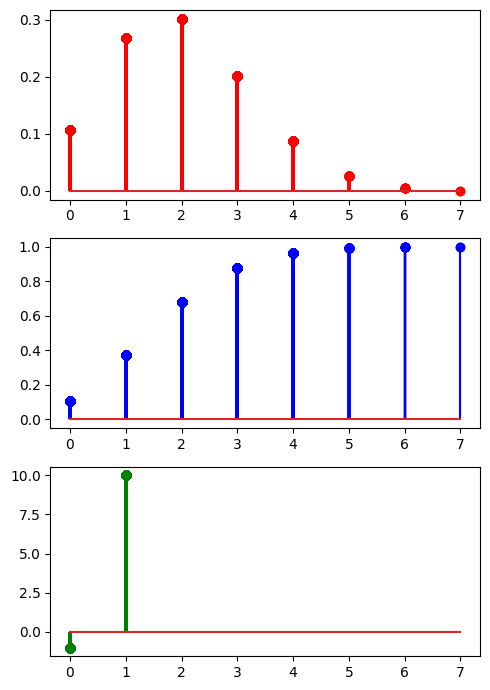

In [65]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [66]:
from scipy.stats import norm

In [67]:
#NORMALES!!!
def dnorm(x, size, prob=0.5):
    mu = size * prob
    sigma = np.sqrt(size * prob * (1 - prob))
    return norm.pdf(x, loc=mu, scale=sigma)

def pnorm(q, size, prob=0.5):
    mu = size * prob
    sigma = np.sqrt(size * prob * (1 - prob))
    return norm.cdf(q, loc=mu, scale=sigma)

def qnorm(p, size, prob=0.5):
    mu = size * prob
    sigma = np.sqrt(size * prob * (1 - prob))
    return norm.ppf(p, loc=mu, scale=sigma)

def rnorm(n, size, prob=0.5):
    mu = size * prob
    sigma = np.sqrt(size * prob * (1 - prob))
    return norm.rvs(loc=mu, scale=sigma, size=n)



In [68]:
media = 10 * 0.2
desviacion = np.sqrt(10 * 0.2 * 0.8)

print(f"Densidad de probabilidad de una Normal({media:.2f}, {desviacion:.2f}) en el valor 2: {norm.pdf(2, loc=media, scale=desviacion)}")
print(f"Probabilidad de que una Normal({media:.2f}, {desviacion:.2f}) tome un valor menor que 2: {norm.cdf(2, loc=media, scale=desviacion)}")
print(f"Valor de una Normal({media:.2f}, {desviacion:.2f}) con una probabilidad acumulada de 0.9: {norm.ppf(0.9, loc=media, scale=desviacion)}")
print(f"2000 valores aleatorios generados de una Normal({media:.2f}, {desviacion:.2f}):\n{norm.rvs(loc=media, scale=desviacion, size=2000)}")


Densidad de probabilidad de una Normal(2.00, 1.26) en el valor 2: 0.31539156525252005
Probabilidad de que una Normal(2.00, 1.26) tome un valor menor que 2: 0.5
Valor de una Normal(2.00, 1.26) con una probabilidad acumulada de 0.9: 3.621048754430201
2000 valores aleatorios generados de una Normal(2.00, 1.26):
[0.88943011 0.95406989 1.71352434 ... 1.95468383 1.32775726 0.01679727]


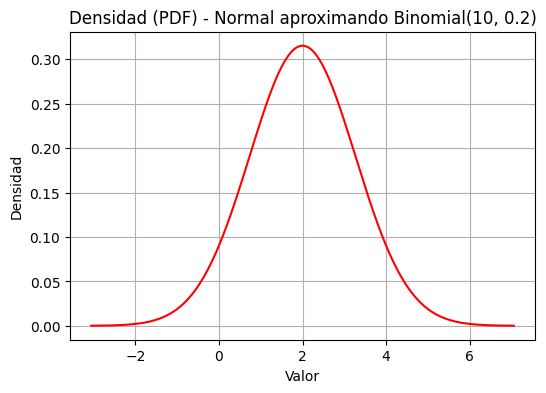

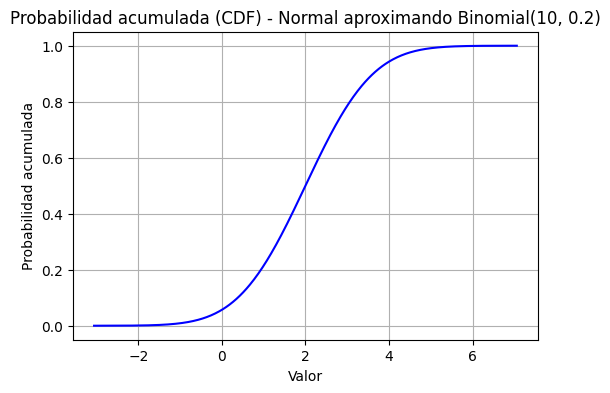

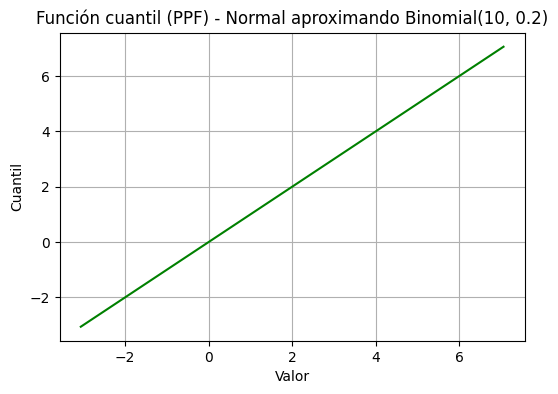

In [69]:
size = 10
prob = 0.2
media = size * prob
desviacion = np.sqrt(size * prob * (1 - prob))


x = np.linspace(media - 4*desviacion, media + 4*desviacion, 500)


pdf = norm.pdf(x, loc=media, scale=desviacion)
cdf = norm.cdf(x, loc=media, scale=desviacion)
ppf = norm.ppf(norm.cdf(x, loc=media, scale=desviacion), loc=media, scale=desviacion)


plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='red')
plt.title("Densidad (PDF) - Normal aproximando Binomial(10, 0.2)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(x, cdf, color='blue')
plt.title("Probabilidad acumulada (CDF) - Normal aproximando Binomial(10, 0.2)")
plt.xlabel("Valor")
plt.ylabel("Probabilidad acumulada")
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(x, ppf, color='green')
plt.title("Función cuantil (PPF) - Normal aproximando Binomial(10, 0.2)")
plt.xlabel("Valor")
plt.ylabel("Cuantil")
plt.grid(True)
plt.show()

In [70]:
#Uniformes!!!
from scipy.stats import uniform

def dunif(x, a=0, b=1):
    """
    Calcula la densidad de probabilidad de la distribución uniforme.
    """
    scale = b - a
    return uniform.pdf(x, loc=a, scale=scale)

def punif(q, a=0, b=1):
    """
    Calcula la probabilidad acumulada hasta q de la distribución uniforme.
    """
    scale = b - a
    return uniform.cdf(q, loc=a, scale=scale)

def qunif(p, a=0, b=1):
    """
    Calcula el cuantil de la distribución uniforme para una probabilidad p.
    """
    scale = b - a
    return uniform.ppf(p, loc=a, scale=scale)

def runif(n, a=0, b=1):
    """
    Genera n valores aleatorios de la distribución uniforme.
    """
    scale = b - a
    return uniform.rvs(loc=a, scale=scale, size=n)



In [71]:
a = 0
b = 1
scale = b - a

print(f"Densidad de probabilidad de una Uniforme[{a},{b}] en el valor 0.2: {uniform.pdf(0.2, loc=a, scale=scale)}")
print(f"Probabilidad de que una Uniforme[{a},{b}] tome un valor menor que 0.2: {uniform.cdf(0.2, loc=a, scale=scale)}")
print(f"Valor de una Uniforme[{a},{b}] con una probabilidad acumulada de 0.9: {uniform.ppf(0.9, loc=a, scale=scale)}")
print(f"2000 valores aleatorios generados de una Uniforme[{a},{b}]:\n{uniform.rvs(loc=a, scale=scale, size=2000)}")


Densidad de probabilidad de una Uniforme[0,1] en el valor 0.2: 1.0
Probabilidad de que una Uniforme[0,1] tome un valor menor que 0.2: 0.2
Valor de una Uniforme[0,1] con una probabilidad acumulada de 0.9: 0.9
2000 valores aleatorios generados de una Uniforme[0,1]:
[0.59929929 0.51370786 0.28818453 ... 0.02583897 0.22177949 0.78047114]


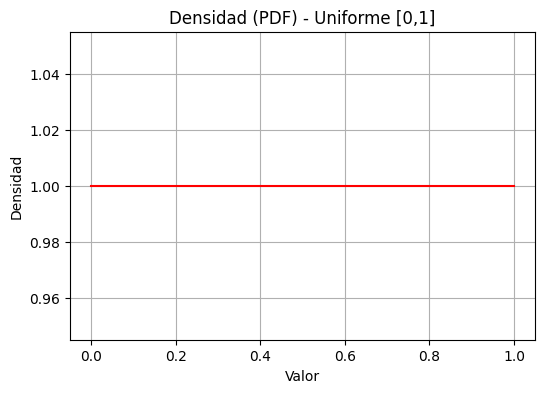

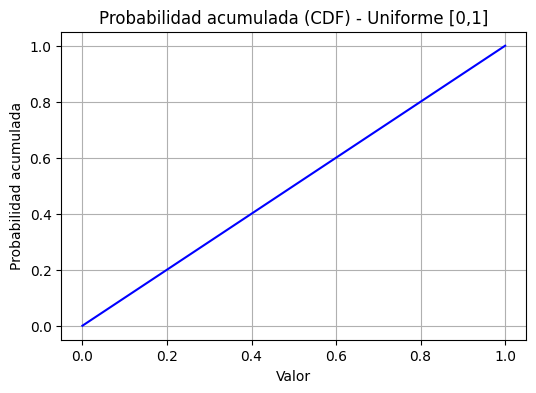

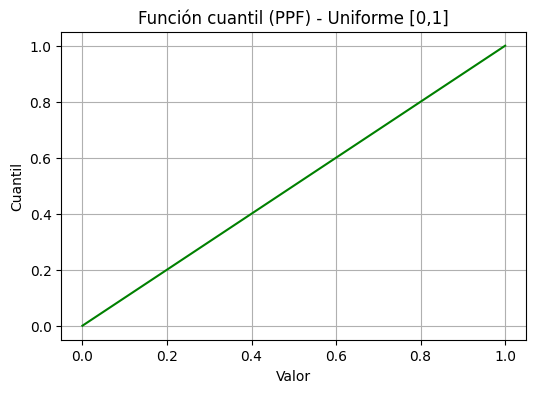

In [72]:
a = 0
b = 1
scale = b - a

x = np.linspace(a, b, 500)

pdf = uniform.pdf(x, loc=a, scale=scale)
cdf = uniform.cdf(x, loc=a, scale=scale)
ppf = uniform.ppf(cdf, loc=a, scale=scale)


plt.figure(figsize=(6,4))
plt.plot(x, pdf, color='red')
plt.title("Densidad (PDF) - Uniforme [0,1]")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(x, cdf, color='blue')
plt.title("Probabilidad acumulada (CDF) - Uniforme [0,1]")
plt.xlabel("Valor")
plt.ylabel("Probabilidad acumulada")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(x, ppf, color='green')
plt.title("Función cuantil (PPF) - Uniforme [0,1]")
plt.xlabel("Valor")
plt.ylabel("Cuantil")
plt.grid(True)
plt.show()
